# Random Image stacker
To stack multiple images on a given scene and generte an annotation file of the overlaying images. Comparble to to students in a Lecture Hall; Output is GroupPhoto, GroupLabel.

Note: 
* bg - background
* fg - foreground

**Inputs**: 
* bg_img : base image
* fg_img : overlayed on background

**Output**:
* stack_img : overlay(bg_img, random_augmentation(fg_img)
* stack_ann : annotation(stack_img)

**Operataions**:

* overlay(a, b): Overlay a with b
* annotation(a): Generate the annotation of a

In [1]:
import numpy as np
import cv2
# import imgaug
# import glob
# import random
import matplotlib.pyplot as plt
import pathlib

from imgaug import augmenters as iaa
from PIL import Image

In [2]:
from random import seed
from random import randint
from random import random
seed(1)

In [3]:
from random_image_stacker import load_bg_fg_img, generate_stacked_img
from random_image_stacker import labels_from_file

In [4]:
# Defining the path of bg and fg images

CWD = pathlib.Path.cwd()
BG_PATH = CWD / 'data/bg_img'
FG_PATH = CWD / 'data/fg_img'

bg_size = (256,256)
fg_size = (100,100)

bg_list, fg_list = load_bg_fg_img(BG_PATH, FG_PATH, bg_size, fg_size)

bg_arr (1, 256, 256, 4)
fg_arr (56, 100, 100, 4)


In [5]:
fg_labels, fg_config = labels_from_file(FG_PATH)
print(fg_labels)

[5 4 5 2 4 2 4 2 4 2 3 3 5 6 4 3 3 5 5 6 5 1 1 2 5 4 3 2 6 6 3 4 4 6 2 5 4
 6 4 6 6 6 4 1 6 1 3 6 2 2 3 5 4 4 1 1]


In [6]:
print(fg_config)

{1: 'blue', 2: 'darkblue', 3: 'green', 4: 'grey', 5: 'red', 6: 'white'}


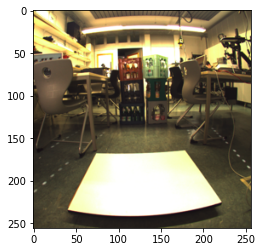

In [7]:
bg_sample = bg_list[0]
fg_sample = fg_list[0]
plt.imshow(bg_sample/255)

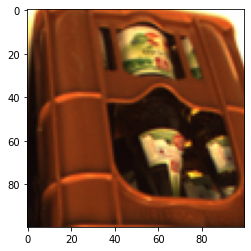

In [8]:
plt.imshow(fg_sample/255)

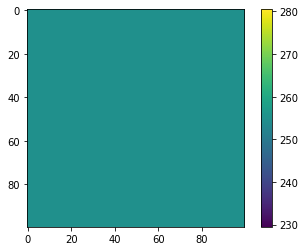

In [9]:
plt.imshow(fg_sample[:,:,3])
plt.colorbar()

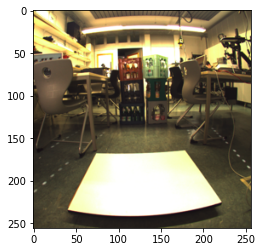

In [10]:
plt.imshow(bg_list[0]/255)

In [11]:
aug_config = {'base_x':35, 'base_y':40, 'x_var':5, 'y_var':5, 'w_init':95, 'h_init':95, 'w_var':5, 'h_var':5}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


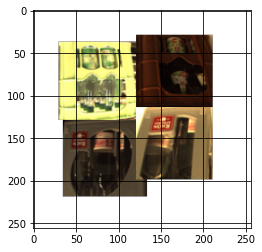

In [33]:
empty_scene = bg_list[0]
# empty_scene = np.zeros(bg_list[0].shape)
stacked_im, annot_im = generate_stacked_img(empty_scene, fg_list,fg_labels, aug_config)
plt.imshow(stacked_im/255)
plt.grid('on',color='black')

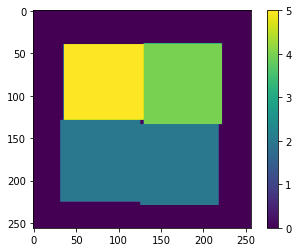

In [23]:
plt.imshow(annot_im)
plt.colorbar()

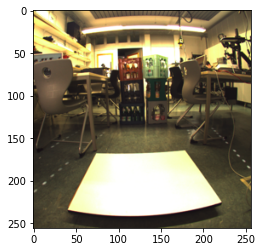

In [14]:
plt.imshow(bg_list[0]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


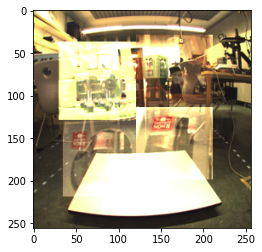

In [44]:
src1 = bg_list[0]
src2 = stacked_im

dst = cv2.addWeighted(src1,1,src2,1, 0)
plt.imshow(dst/255)

In [45]:
im = Image.fromarray(src2[:,:,:]/255, mode='RGBA')

In [46]:
src2.shape

(256, 256, 4)

In [47]:
im.show()